In [1]:
import pandas as pd
import numpy as np

from bursty_dynamics.scores import calculate_scores
from bursty_dynamics.trains import train_detection, train_info, train_scores
from bursty_dynamics.visual import *

# Bursty Dynamics

We will demonstrate how to use Burst_dynamic to:
- [Calcualte the Burstness Parameter (BP) and Memory Coefficient (MC)](#section_1)
- [Detect train of events](#section_2)
- [Get inforamtion of the trains](#section_3)
- [Calculate the BP and MC of the trains](#section_4)
- [Analysing Data with Group Comparisons](#section_5)

## Load data

we will use the 'set3a1.txt' medical data from [UK Biobank Synthetic Dataset](https://biobank.ndph.ox.ac.uk/synthetic_dataset/). 
Out of 23827 unique eids, there are only 500 eids in the example_data.txt because of the limited data space on Github.


In [3]:
df = pd.read_csv("example_data.txt", delimiter= '\t')

In [4]:
df.shape

(858626, 8)

In [5]:
df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3
0,1707540,1,2000-01-01,635..,NaN,NaN,NaN,NaN
1,1707540,1,2000-01-01,J11..,NaN,NaN,NaN,NaN
2,1707540,1,2000-01-01,12E2.,NaN,NaN,NaN,NaN
3,1707540,1,2000-01-01,452..,NaN,33.94,80.319,NaN
4,1707540,1,1999-12-31,05K3.,NaN,NaN,NaN,NaN


## Calculate BP and MC. <a id='section_1'></a>

We can calculate the BP and the MC per subject id using the calculate_scores function.

In [6]:
# calculate scores
score_df = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt')

In [7]:
score_df.head()

,eid,BP,MC
0,1007157,0.606976,0.188424
1,1016564,0.528581,0.631336
2,1019777,0.554650,0.726996
3,1037979,0.376930,0.562070
4,1046250,0.296580,0.491646


We can view a scatter plot of BP against MC by using the parameter 'scatter'.

In [8]:
score_df, scatter_plot = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt', scatter=True)

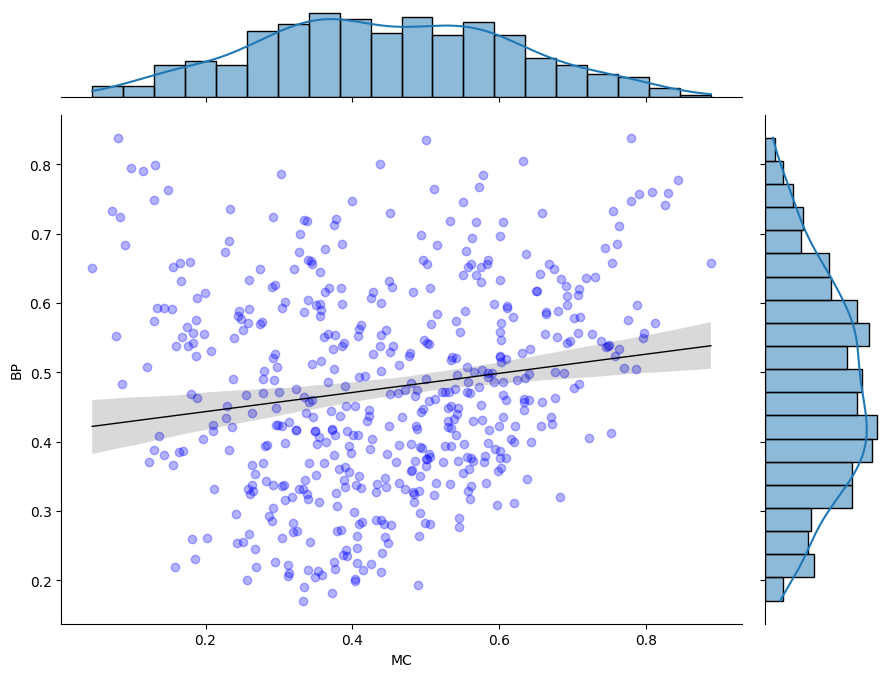

In [9]:
scatter_plot

In [10]:
score_df,hist_plots  = calculate_scores(df, subject_id='eid', time_col='event_dt', hist=True)

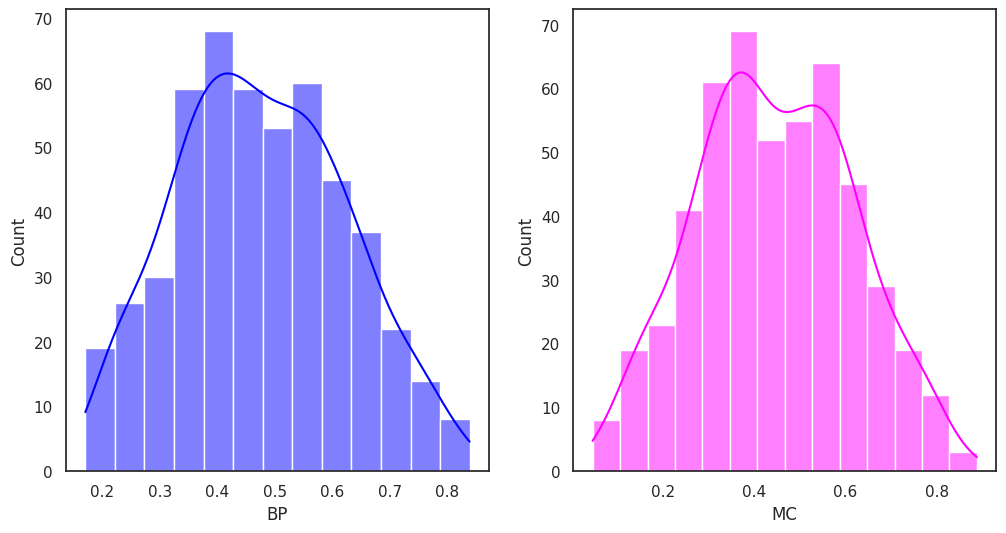

In [11]:
hist_plots

In [12]:
score_df,scatter_plot,hist_plot  = calculate_scores(df, subject_id='eid', time_col='event_dt', scatter=True, hist='Both')

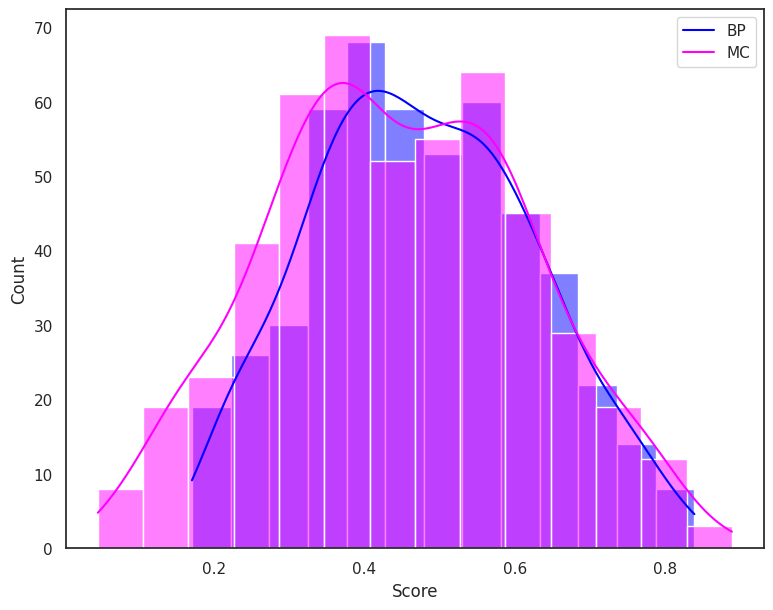

In [13]:
hist_plot

## Detect trains <a id='section_2'></a>

### Parameters

    df : DataFrame
        The DataFrame containing the data.
    subject_id : str
        The column name for subject IDs.
    time_col : str
        The column name for the datetime values.
    max_iet : int
        Maximum distance between consecutive events in a train, in units specified by `time_unit`.
    time_unit : str, optional
        Unit of time for the intervals ('seconds', 'minutes', 'hours', 'days', 'weeks', 'months', and 'years').
        Default is 'days'.
    min_burst : int, optional
        Minimum number of events required to form a train. Default is 3.
    only_trains : bool, optional
        Whether to return only the events that form trains. Default is True.

Note: train_id = 0 is not a train. They represent events that are not in a train. 

In [14]:
train_df = train_detection(df, subject_id = 'eid', time_col = 'event_dt', max_iet=30, time_unit='days', min_burst=3, only_trains= True)

In [15]:
train_df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,train_id
542984,1007157,4,1974-08-15,7H290,NaN,36.947,47.591,NaN,2
543469,1007157,4,1974-08-18,65FV.,NaN,NaN,NaN,NaN,2
543691,1007157,4,1974-08-22,K0A53,NaN,95.000,40.000,NaN,2
544074,1007157,4,1975-05-13,43iG.,NaN,NaN,NaN,NaN,5
544450,1007157,4,1975-05-24,687F2,NaN,83.815,36.296,NaN,5


## Train information <a id='section_3'></a>

We can use the train_info fucntion to find more information about the trains. <br>

### Parameters

    train_df : DataFrame
        DataFrame containing train information.
    subject_id : str
        Name of the column containing subject IDs.
    time_col : str
        Name of the column containing timestamps.
    summary_statistic : bool, optional
        Whether to print summary statistics. Default is False.

In [16]:
train_info_df = train_info(train_df, subject_id = 'eid', time_col = 'event_dt', summary_statistic=True)

Average count of trains per patient: 67.07
Average duration of trains (in days): 99
Median duration of trains (in days): 50
Range of unique events per train: 1 - 3585
Range of all events per train: 3 - 4977


In [17]:
train_info_df.head()

,eid,train_id,unique_event_counts,total_term_counts,train_start,train_end,train_duration_yrs,total_trains
0,1007157,2,3,3,1974-08-15,1974-08-22,0.02,36
1,1007157,5,3,3,1975-05-13,1975-06-15,0.09,36
2,1007157,6,4,4,1975-08-09,1975-09-20,0.11,36
3,1007157,16,3,3,1978-09-24,1978-10-04,0.03,36
4,1007157,18,4,5,1979-08-08,1979-09-26,0.13,36


## Calculate scores of trains <a id='section_4'></a>

We can calculate the scores of the trains detected using the train_scores function. <br>
### Parameters

    train_df : pd.DataFrame
        Input DataFrame.
    subject_id : str
        Name of the column containing subject IDs.
    time_col : str
        Name of the column containing the date.
    min_event_n : int, optional
        Maximum IET for filtering events. Defaults to None.
    scatter : bool, optional
        Whether to plot scatter plot. Defaults to False.
    hist : str or None, optional
        Type of histogram to plot. Options:
        - True: Plot histograms for both BP and MC.
        - "BP": Plot histogram for BP only.
        - "MC": Plot histogram for MC only.
        - "Both": Plot histograms for both BP and MC on the same plot.
        - False: Do not plot any histograms. Defaults to False.

In [18]:
train_score_df = train_scores(train_df, subject_id = 'eid', time_col ='event_dt', min_event_n= 5)
train_score_df.head()

,eid,train_id,BP,MC
0,1007157,19,-0.111111,-0.798446
1,1007157,20,-0.284329,-0.269896
2,1007157,23,-0.333745,-0.500000
3,1007157,24,-0.112983,-0.528501
4,1007157,26,-0.330692,-0.848931


In [19]:
train_score_df, scatter_plot, hist_plot = train_scores(train_df, subject_id='eid', time_col='event_dt', min_event_n=5, scatter=True, hist=True)

In [20]:
train_score_df.head()

,eid,train_id,BP,MC
0,1007157,19,-0.111111,-0.798446
1,1007157,20,-0.284329,-0.269896
2,1007157,23,-0.333745,-0.500000
3,1007157,24,-0.112983,-0.528501
4,1007157,26,-0.330692,-0.848931


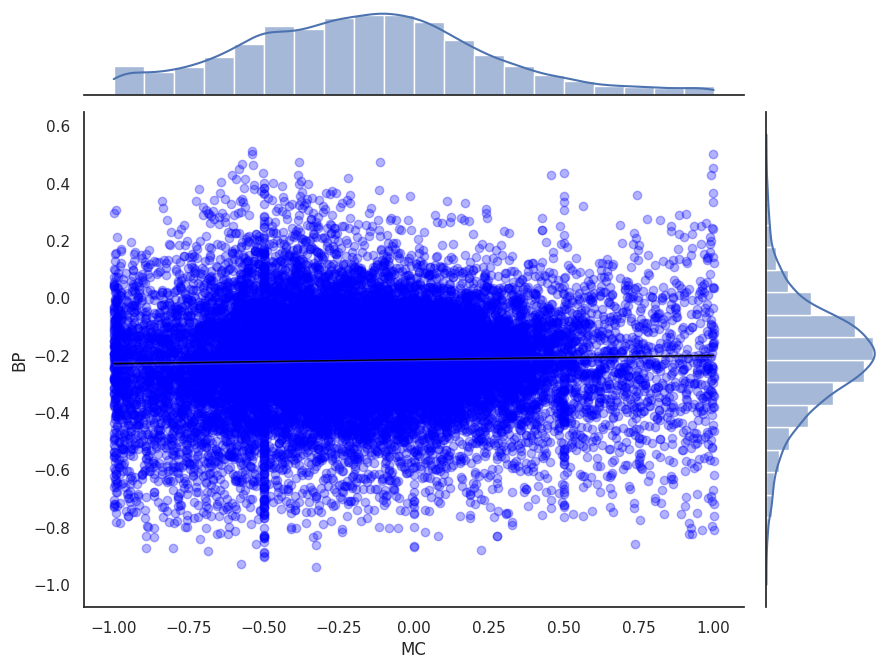

In [21]:
scatter_plot

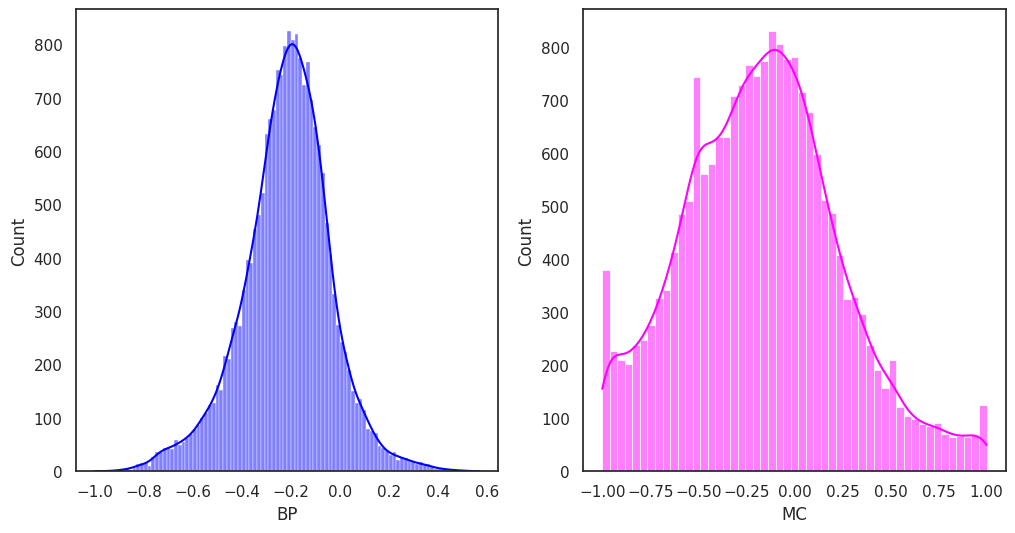

In [22]:
hist_plot

In [23]:
train_score_df, scatter_plot, hist_plot = train_scores(train_df, subject_id='eid', time_col='event_dt', min_event_n=5, scatter=True, hist="Both")

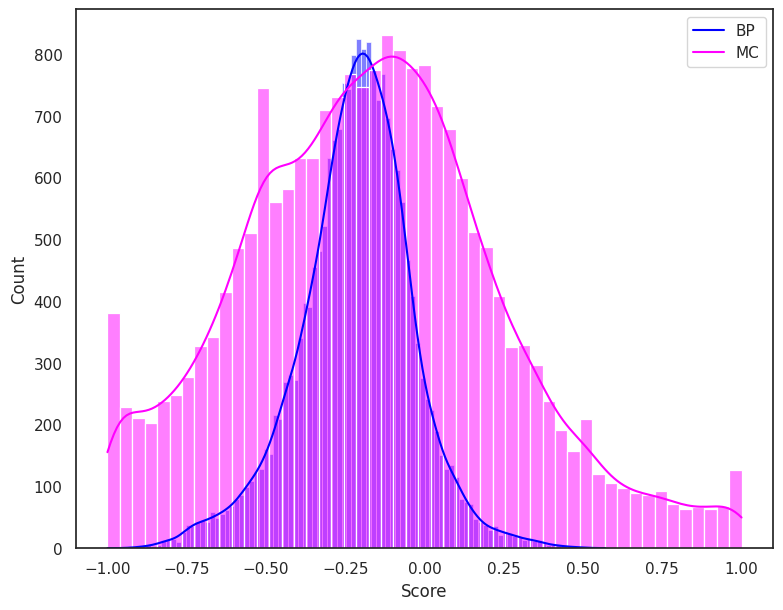

In [24]:
hist_plot

### Plots


In [25]:
gplot = gridplot(train_score_df, bins=25, lower_limit=100)

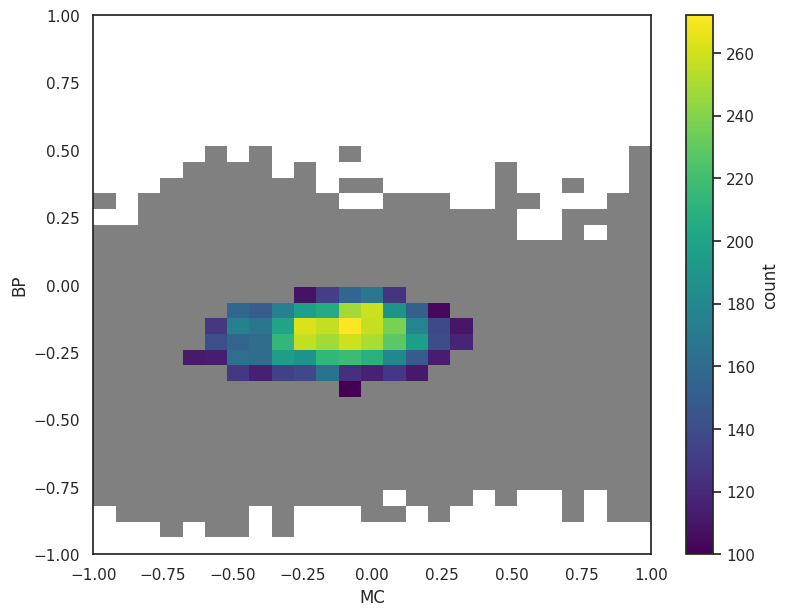

In [26]:
gplot

In [27]:
plot = scatterplot(train_score_df, set_axis=False)

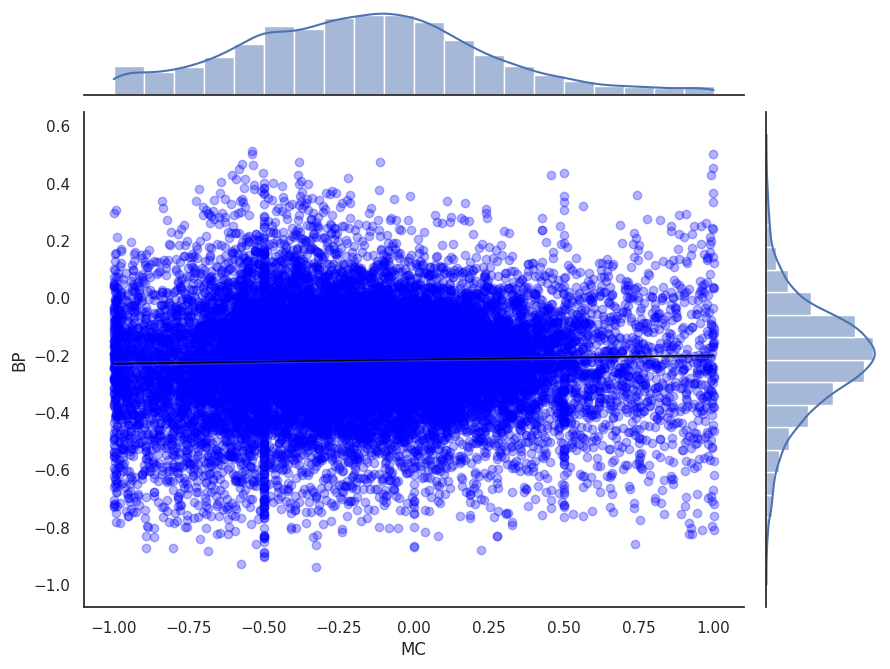

In [28]:
plot

In [29]:
hplot = histogram(train_score_df, hist='Both', set_axis=False)

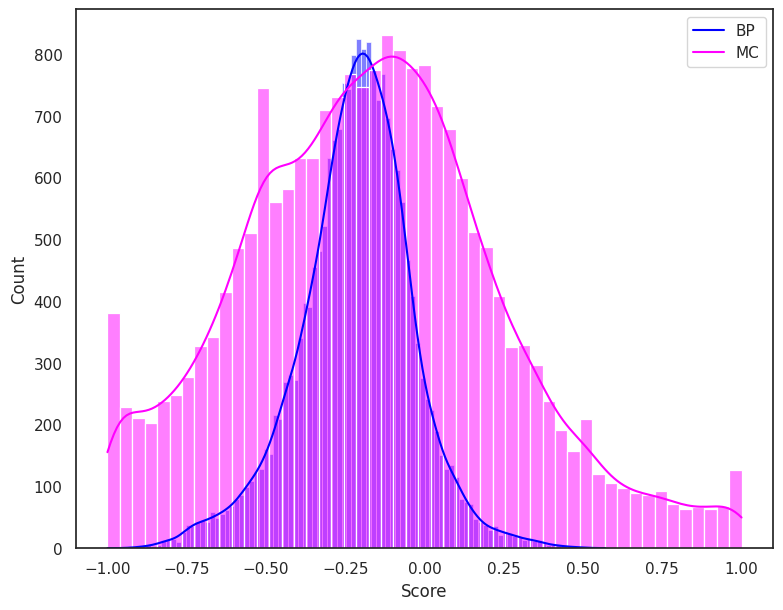

In [30]:
hplot

In [31]:
duration_plot = train_duration(train_info_df, x_limit = 5)

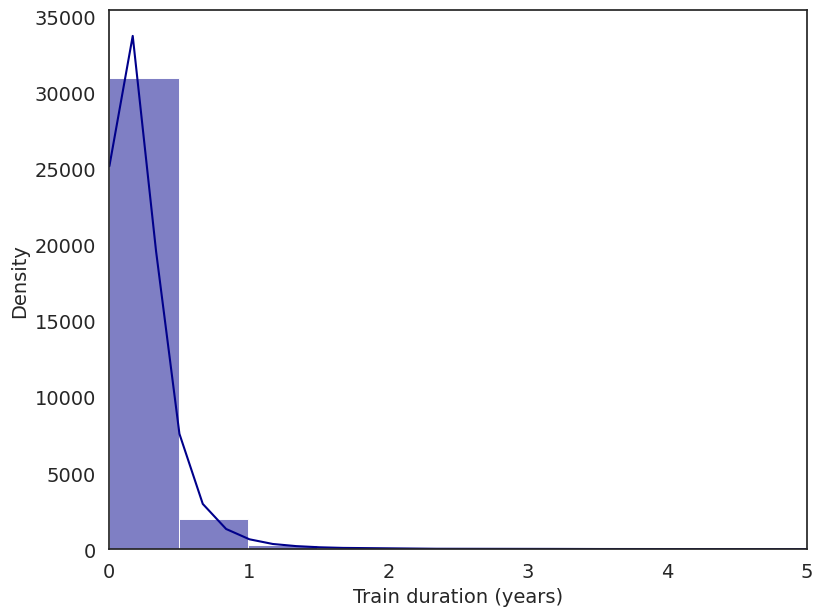

In [32]:
duration_plot

In [33]:
count_plot = event_counts(train_info_df, x_limit=30)

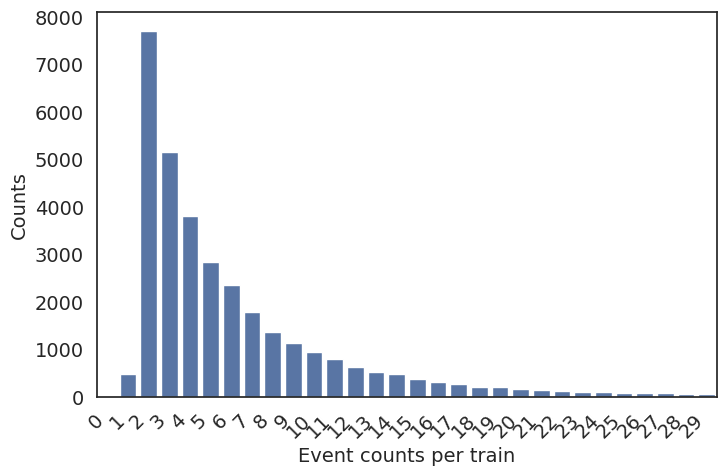

In [34]:
count_plot

# Analysing Data with Group Comparisons <a id='section_5'></a>

## Introduction
In this section, we analyse a dataset of events to understand patterns and differences based on different categorical groups. We create synthetic categorical data, calculate scores, detect event trains and visualise the data. Users can replace these synthetic groups with actual categorical data from their dataset, such as gender or age groups, to perform a more meaningful analysis.

## Data Loading and Preprocessing


In [2]:
df = pd.read_csv("example_data.txt", delimiter= '\t')
df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3
0,1707540,1,2000-01-01,635..,NaN,NaN,NaN,NaN
1,1707540,1,2000-01-01,J11..,NaN,NaN,NaN,NaN
2,1707540,1,2000-01-01,12E2.,NaN,NaN,NaN,NaN
3,1707540,1,2000-01-01,452..,NaN,33.94,80.319,NaN
4,1707540,1,1999-12-31,05K3.,NaN,NaN,NaN,NaN


## Scores of entire data

we calculate scores for each subject.

In [3]:
# calculate scores
score_df = calculate_scores(df, subject_id = 'eid', time_col = 'event_dt')

This grouping is purely for illustration purposes to demonstrate how the analysis and visualizations work, as our dataset does not have categorical data.

In [4]:
## Generate Synthetic Groups
lower_quantile = score_df['BP'].quantile(0.25)
upper_quantile = score_df['BP'].quantile(0.75)

score_df['Group'] = score_df['BP'].apply(
    lambda x: 'Group_A' if x <= lower_quantile else ('Group_B' if x <= upper_quantile else 'Group_C')
)
score_df.head()

,eid,BP,MC,Group
0,1007157,0.606976,0.188424,Group_C
1,1016564,0.528581,0.631336,Group_B
2,1019777,0.554650,0.726996,Group_B
3,1037979,0.376930,0.562070,Group_B
4,1046250,0.296580,0.491646,Group_A


In [14]:
score_df['Group'].value_counts()

Group
Group_B    250
Group_C    125
Group_A    125
Name: count, dtype: int64

We visualise the scores using scatterplots and histograms, differentiating by group.

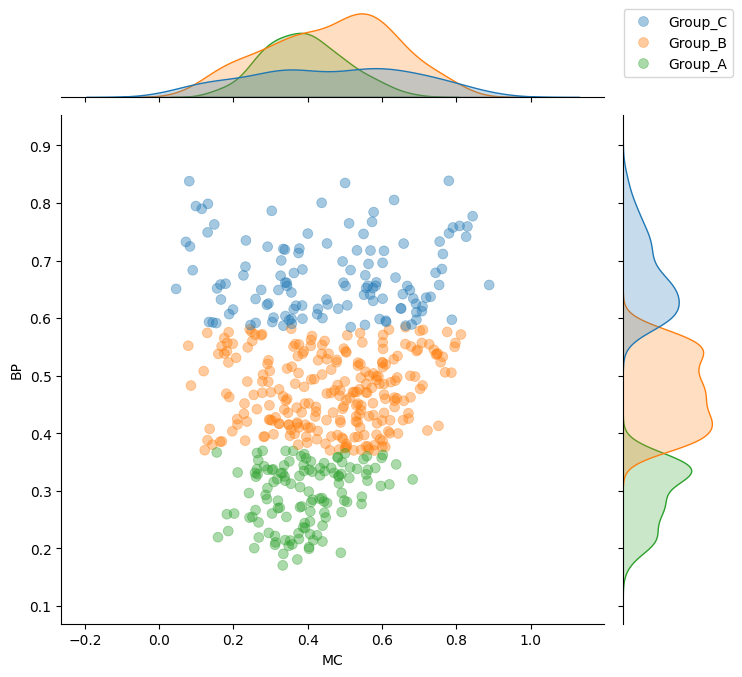

In [5]:
scatterplot(score_df, hue="Group")

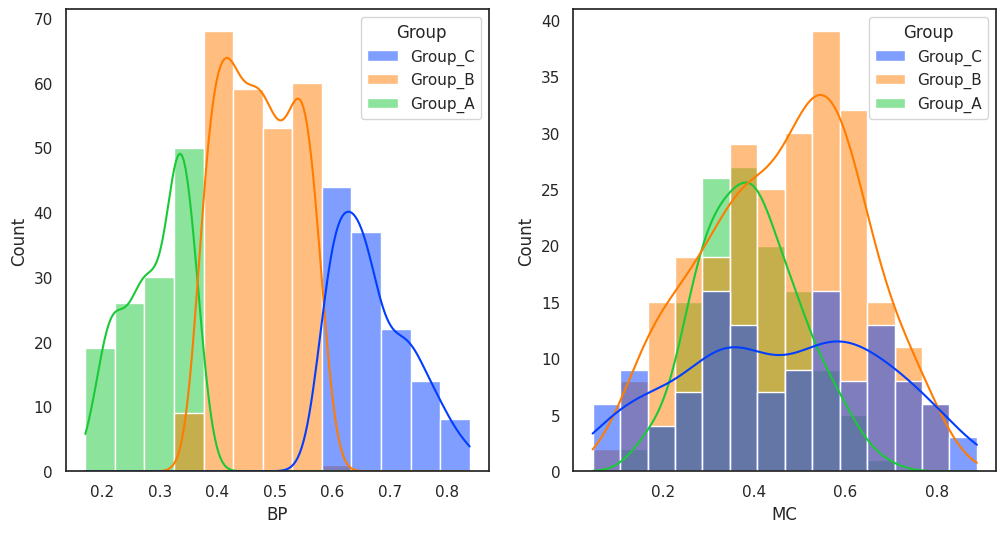

In [6]:
histogram(score_df, hist=True , set_axis=False, hue='Group')

## Train Detection
We perform train detection and analysis to extract events with specific characteristics. The functions used are:
- `train_detection`: Identifies train events based on specified parameters.
- `train_info`: Provides summary statistics about the detected trains.
- `train_scores`: Computes scores for detected trains.

We also merge the group information to the resulting DataFrames for further analysis.


In [7]:
train_df = train_detection(df, subject_id = 'eid', time_col = 'event_dt', max_iet=30, time_unit='days', min_burst=3, only_trains= True)
train_info_df = train_info(train_df, subject_id = 'eid', time_col = 'event_dt', summary_statistic=True)
train_score_df = train_scores(train_df, subject_id='eid', time_col='event_dt', min_event_n=5)

# Merge group information
train_info_df = train_info_df.merge(score_df[['eid', 'Group']], on='eid', how='left')
train_score_df = train_score_df.merge(score_df[['eid', 'Group']], on='eid', how='left')

Average count of trains per patient: 67.07
Average duration of trains (in days): 99
Median duration of trains (in days): 50
Range of unique events per train: 1 - 3585
Range of all events per train: 3 - 4977


In [8]:
train_df.head()

,eid,data_provider,event_dt,read_2,read_3,value1,value2,value3,train_id
542984,1007157,4,1974-08-15,7H290,NaN,36.947,47.591,NaN,2
543469,1007157,4,1974-08-18,65FV.,NaN,NaN,NaN,NaN,2
543691,1007157,4,1974-08-22,K0A53,NaN,95.000,40.000,NaN,2
544074,1007157,4,1975-05-13,43iG.,NaN,NaN,NaN,NaN,5
544450,1007157,4,1975-05-24,687F2,NaN,83.815,36.296,NaN,5


Visualise train data

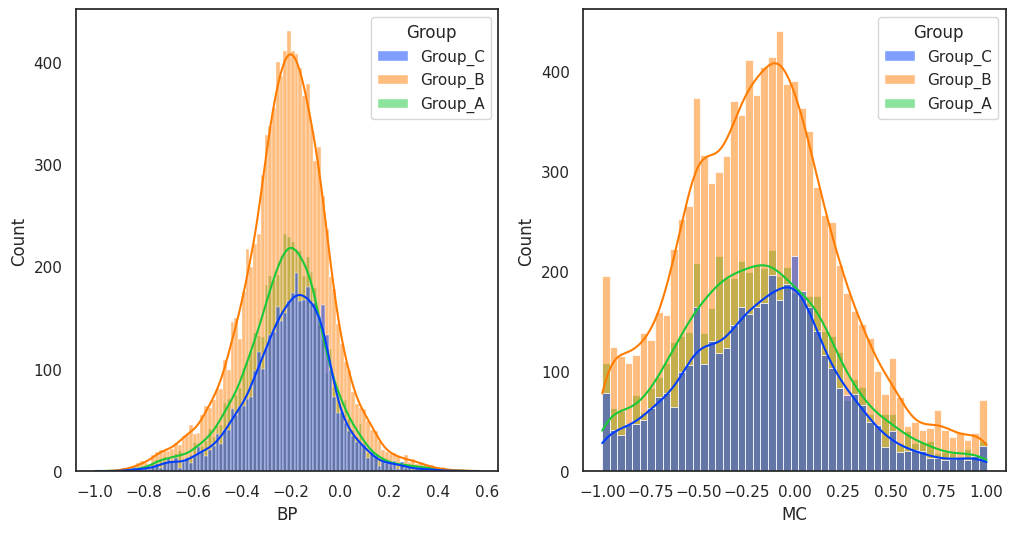

In [9]:
histogram(train_score_df, hist=True, set_axis=False, hue='Group')

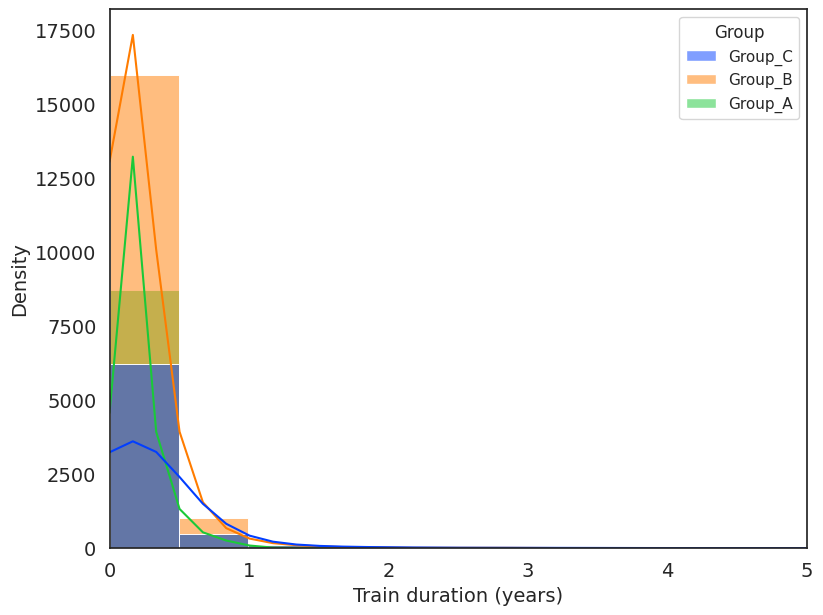

In [10]:
# Train duration
train_duration(train_info_df, hue = 'Group')

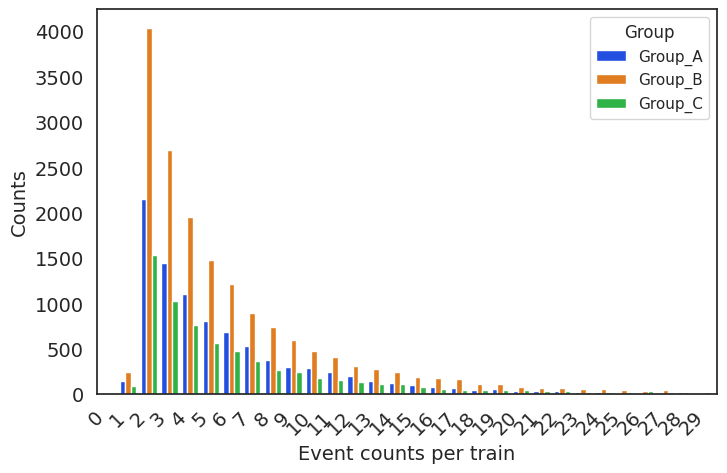

In [11]:
# Event counts
event_counts(train_info_df, hue='Group')